In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

#here os.walk--- scanning doc either from bottom up or topdown etc search for syntax in google to knoe better
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [ ]:
infile = "/hair_cosmetics.zip"
df = pd.read_csv(infile)
df

,ingredients,PEH group
0,"Aqua, Cetearyl Alcohol, Behentrimonium Chlorid...",PEH
1,"Aqua, Cetearyl Alcohol, Behentrimonium Chlorid...",PEH
2,"Aqua, Glycerin, Cetearyl Alcohol, Isopropyl Pa...",PEH
3,"Aqua, Decyl Glucoside, Glycerin, Babassu Oil P...",PEH
4,"Aqua, Decyl Glucoside, Glycerin, Cetearyl Alco...",EH
...,...,...
149,"Glycerin, Water, Cyclopentasiloxane, Dimethico...",PH
150,"Aqua, Cetearyl Alcohol, Caprylic/Capric Trigly...",PH
151,"Aqua, Cocos Nucifera Oil, Glyceryl Stearate, G...",P
152,"Aqua, Cetearyl Alcohol, Cetyl Alcohol, Behentr...",P


In [ ]:


#Unifying ingredients (removing spaces between words)

for i in range(len(df["ingredients"]) - 1):
    df["ingredients"][i] = df["ingredients"][i].replace(" ","")



In [ ]:
df.head()

,ingredients,PEH group
0,"Aqua,CetearylAlcohol,BehentrimoniumChloride,Pr...",PEH
1,"Aqua,CetearylAlcohol,BehentrimoniumChloride,Co...",PEH
2,"Aqua,Glycerin,CetearylAlcohol,IsopropylPalmita...",PEH
3,"Aqua,DecylGlucoside,Glycerin,BabassuOilPolygly...",PEH
4,"Aqua,DecylGlucoside,Glycerin,CetearylAlcohol,B...",EH


In [ ]:
#vectorizing here
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()
df_vectors = vectorizer.fit_transform(df["ingredients"])

In [ ]:
#fitting the vector using standard scalar

#StandardScaler : It transforms the data in such a manner that it has mean as 0 and standard deviation as 1.
# In short, it standardizes the data. 
#Standardization is useful for data which has negative values.
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler(with_mean = False)
df_vectors = sc.fit_transform(df_vectors)

In [ ]:
#Encoding PEH groups from categorical data to numerical.

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["PEH group"] = le.fit_transform(df["PEH group"])



In [ ]:
df.head()

,ingredients,PEH group
0,"Aqua,CetearylAlcohol,BehentrimoniumChloride,Pr...",5
1,"Aqua,CetearylAlcohol,BehentrimoniumChloride,Co...",5
2,"Aqua,Glycerin,CetearylAlcohol,IsopropylPalmita...",5
3,"Aqua,DecylGlucoside,Glycerin,BabassuOilPolygly...",5
4,"Aqua,DecylGlucoside,Glycerin,CetearylAlcohol,B...",1


In [ ]:
#MACHINE LEARNING

In [ ]:
#STEP -1 SPLITTING 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_vectors, df["PEH group"], shuffle = True)

In [ ]:
#APPROACH-1- RIDEGE REGRESSION 
#Ridge regression is used to quantify the overfitting of the data through measuring the magnitude of coefficients. To fix the problem of overfitting, we need to balance two things: 1. How well function/model fits data. 2. Magnitude of coefficients. 
#So, Total Cost Function = Measure of fit of model + Measure of magnitude of coefficient Here,

In [ ]:
from sklearn import linear_model

model = linear_model.RidgeClassifier()
model.fit(X_train, y_train)

RidgeClassifier()

In [ ]:

y_test_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

mse_regression = mean_squared_error(y_test, y_test_pred)
accuracy_regression = accuracy_score(y_test, y_test_pred)

In [ ]:
#Approach 2. The k-Nearest Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg_model = KNeighborsRegressor(n_neighbors = 5)
knn_reg_model.fit(X_train, y_train)



KNeighborsRegressor()

In [ ]:


y_knn_reg_pred = knn_reg_model.predict(X_test)

mse_knn_reg = mean_squared_error(y_test, y_knn_reg_pred)




In [ ]:
#Approach 3. The k-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:

y_knn_pred = knn_model.predict(X_test)

mse_knn = mean_squared_error(y_test, y_knn_pred)
accuracy_knn = accuracy_score(y_test, y_knn_pred)



In [ ]:
#Approach 4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
y_rf_pred = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_rf_pred)
accuracy_rf = accuracy_score(y_test, y_rf_pred)



In [ ]:
#Approach 5. Artificial Neural Network

In [ ]:
import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:


X_ann_train = X_train.toarray()

ann.fit(X_ann_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 0.2394 - accuracy: 0.1565
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: -0.3296 - accuracy: 0.1217
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: -0.8239 - accuracy: 0.1217
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: -1.3180 - accuracy: 0.1217
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: -1.8932 - accuracy: 0.1217
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: -2.5063 - accuracy: 0.1217
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: -3.1765 - accuracy: 0.1217
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: -3.9230 - accuracy: 0.1217
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: -4.7614 - accuracy: 0.1130
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: -5.6405 - accuracy: 0.1130
Epoch 11/100
4/4 [==

In [ ]:
y_ann_pred = ann.predict(X_test)

mse_ann = mean_squared_error(y_test, y_ann_pred)
accuracy_ann = accuracy_score(y_test, y_ann_pred)



In [ ]:
#Final comparison of the MSE of the models

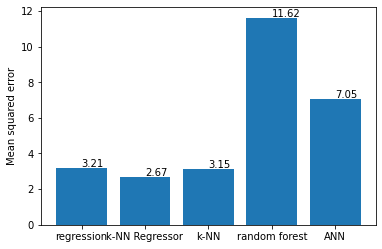

In [ ]:
import matplotlib.pyplot as plt

x = ["regression","k-NN Regressor", "k-NN", "random forest", "ANN"]
y = [mse_regression, mse_knn_reg, mse_knn, mse_rf, mse_ann]

plt.bar(x, y)
plt.ylabel("Mean squared error")
for i in range(len(x)):
        plt.text(i, y[i] + 0.07, round(y[i],2))

plt.show()